In [6]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv(r"C:\Users\Usuario\OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey\Documents\TEC\6to semestre\optimizacion MA2008B\reto ma2008b\data\df_encoded_2.0_FechasIguales.csv")

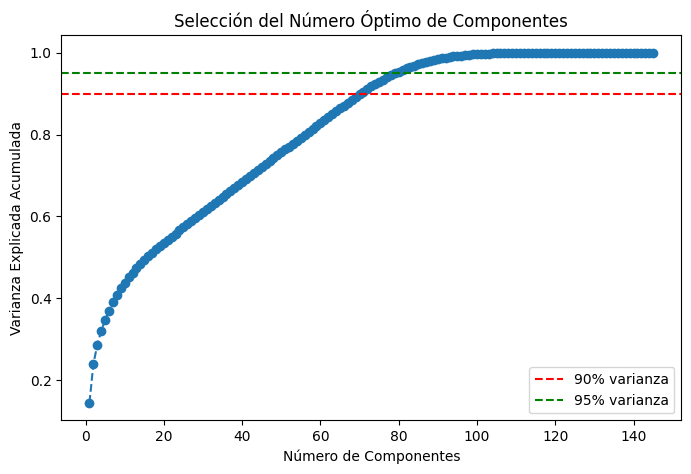

Número óptimo de componentes para capturar 90% de varianza: 71


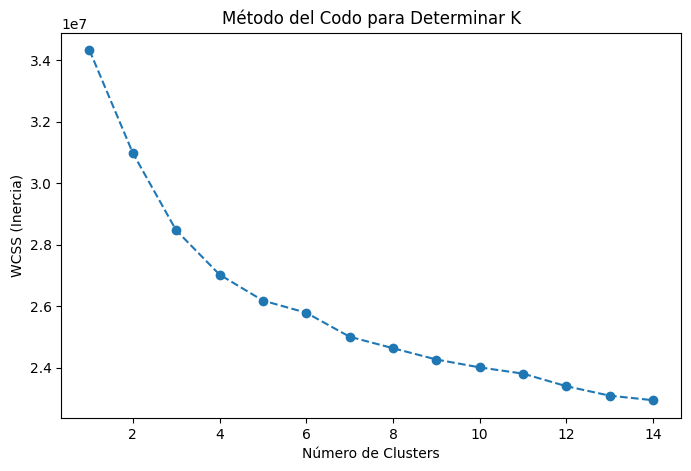

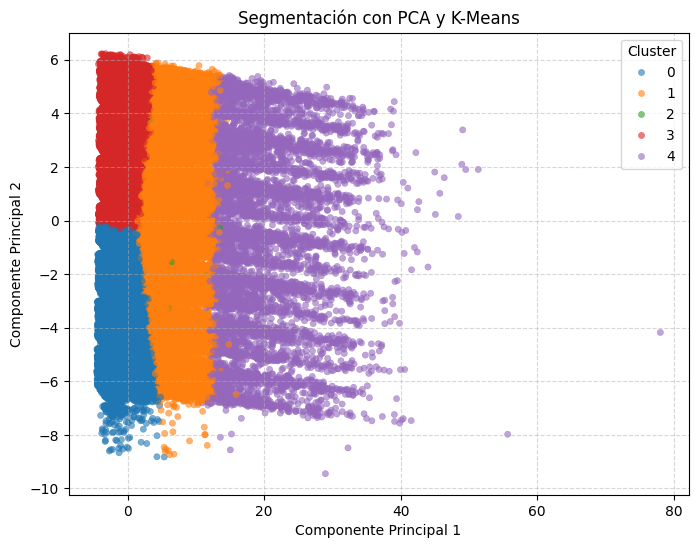

In [10]:
continuous_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
X = data[continuous_cols]

# Estandarizar los datos
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Determinar el número óptimo de componentes con PCA
pca_full = PCA().fit(X_std)
explained_variance = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker="o", linestyle="--")
plt.axhline(y=0.90, color="r", linestyle="--", label="90% varianza")
plt.axhline(y=0.95, color="g", linestyle="--", label="95% varianza")
plt.xlabel("Número de Componentes")
plt.ylabel("Varianza Explicada Acumulada")
plt.title("Selección del Número Óptimo de Componentes")
plt.legend()
plt.show()

optimal_components = np.argmax(explained_variance >= 0.90) + 1
print(f"Número óptimo de componentes para capturar 90% de varianza: {optimal_components}")

# Aplicar PCA con el número óptimo de componentes que sacamos anteriormente
pca = PCA(n_components=optimal_components)
X_pca = pca.fit_transform(X_std)
X_pca_2D = X_pca[:, :2]  # Primeros 2 componentes para visualización

# Método del codo para determinar el número óptimo de clusters
wcss = []
K_range = range(1, 15)  # Rango de clusters
for k in K_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, 'o--', markersize=6)
plt.xlabel("Número de Clusters")
plt.ylabel("WCSS (Inercia)")
plt.title("Método del Codo para Determinar K")
plt.show()

# Seleccionar el número óptimo de clusters ( según la gráfica)
n_clusters = 5  

# Clustering con K-Means usando el número óptimo de clusters
kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Visualización en 2D
pca_df = pd.DataFrame(X_pca_2D, columns=["PC1", "PC2"])
pca_df["Cluster"] = labels

plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="tab10", alpha=0.6, edgecolor=None, s=20)
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.title("Segmentación con PCA y K-Means")
plt.legend(title="Cluster")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()